In [1]:
import sys
import time
import numpy as np  
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import h5py

In [2]:
f = h5py.File('small_QL_g_s1_p0.h5', 'r')

r = f['scales']['r']['1.0']
z = f['scales']['z']['1.0']
th = f['scales']['th']['1.0']
t = f['scales']['sim_time']

th = np.asarray(th)
z = np.asarray(z)
r = np.asarray(r)
t = np.asarray(t)

ul = f['tasks']['ul']
uh = f['tasks']['uh']
vl = f['tasks']['vl']
vh = f['tasks']['vh']
wl = f['tasks']['wl']
wh = f['tasks']['wh']

ul = np.asarray(ul)
uh = np.asarray(uh)
vl = np.asarray(vl)
vh = np.asarray(vh)
wl = np.asarray(wl)
wh = np.asarray(wh)

In [3]:
N_r = r.shape[0]
N_th = th.shape[0]
N_z = z.shape[0]
N_t = t.shape[0]

v_r = ul + uh
v_theta = vl + vh
v_z = wl + wh

In [4]:
## The dimensions correspond to a is t, r, theta, z ##

"""
time_stamp = 0;
v_r_f = np.fft.fft(v_r[time_stamp],axis=1)
v_theta_f = np.fft.fft(v_theta[time_stamp],axis=1)
v_z_f = np.fft.fft(v_z[time_stamp],axis=1)

"""

## This 2-Dimensional array stores the eigenvalues for each corresponding wavenumber m and time t  pair ##
Q = np.zeros((N_th, N_t))

# print(Q.shape)
# print(Q)

for time_stamp in range(N_t):
    v_r_f = np.fft.fft(v_r[time_stamp],axis=1)
    v_theta_f = np.fft.fft(v_theta[time_stamp],axis=1)
    v_z_f = np.fft.fft(v_z[time_stamp],axis=1)
    # print(type(v_z_f))
    # print(type(v_z_f[0][0][0]))
    for m in range(N_th):
        eigen_val = 0
        for R in range(1,N_r):
            for Z in range(1,N_z):
                Q_v_r = v_r_f[Z][m][R]
                Q_v_theta = v_theta_f[Z][m][R]
                Q_v_z = v_z_f[Z][m][R]
                power_amplitude = (Q_v_r)*np.conj(Q_v_r) + (Q_v_theta)*np.conj(Q_v_theta) + (Q_v_z)*np.conj(Q_v_z)
                eigen_val += r[R]*(r[R]-r[R-1])*(z[Z]-z[Z-1])*(power_amplitude)
        Q[m][time_stamp] = 2*(np.pi)*eigen_val 

<ipython-input-4-94894eb267a7>:33: ComplexWarning: Casting complex values to real discards the imaginary part
  Q[m][time_stamp] = 2*(np.pi)*eigen_val


(6,)
[4.09746360e-05 1.33179865e-02 1.56882684e-34 1.90894585e-34
 1.56882684e-34 1.33179865e-02]


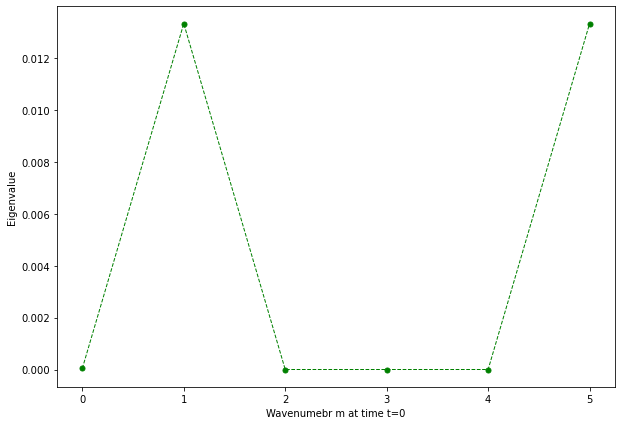

(6,)
[1.35834739e-04 1.36694156e-04 1.91921702e-13 2.15138843e-36
 1.91921702e-13 1.36694156e-04]


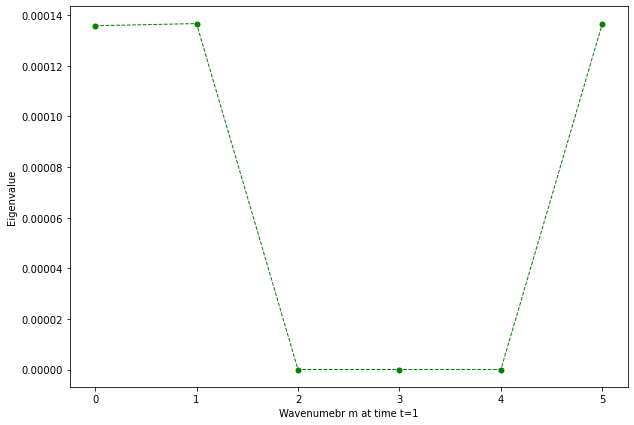

(6,)
[7.83842559e-05 1.87582875e-05 7.19341448e-14 2.88742186e-37
 7.19341448e-14 1.87582875e-05]


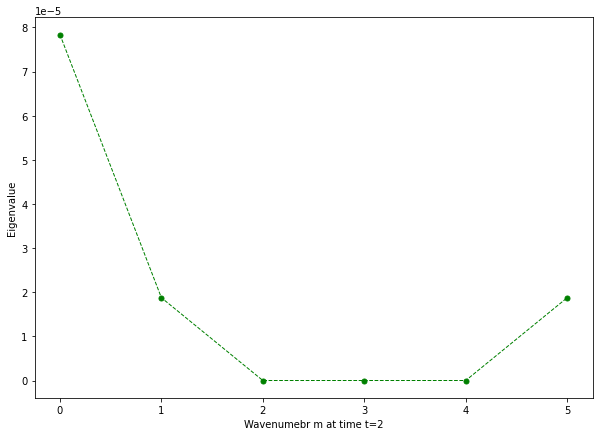

(6,)
[5.48069557e-05 6.45910258e-06 2.71871096e-14 1.38260085e-37
 2.71871096e-14 6.45910258e-06]


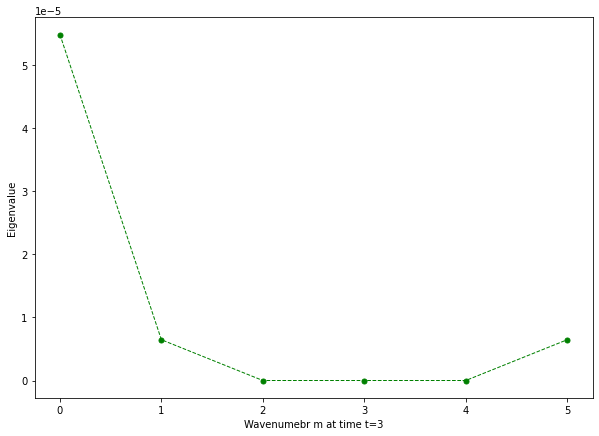

(6,)
[4.61000653e-05 2.59261814e-06 1.03204391e-14 8.40268566e-38
 1.03204391e-14 2.59261814e-06]


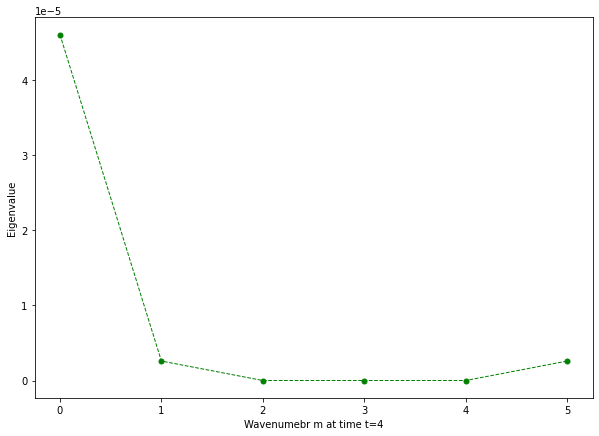

(6,)
[4.28954697e-05 1.05443305e-06 3.92269931e-15 2.35194067e-38
 3.92269931e-15 1.05443305e-06]


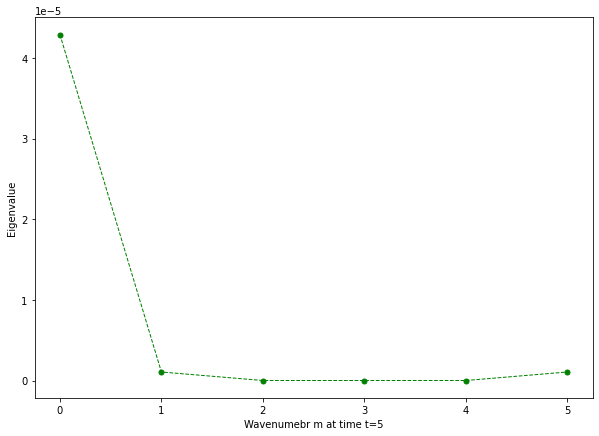

(6,)
[4.17172777e-05 4.29635058e-07 1.49374120e-15 1.94553662e-38
 1.49374120e-15 4.29635058e-07]


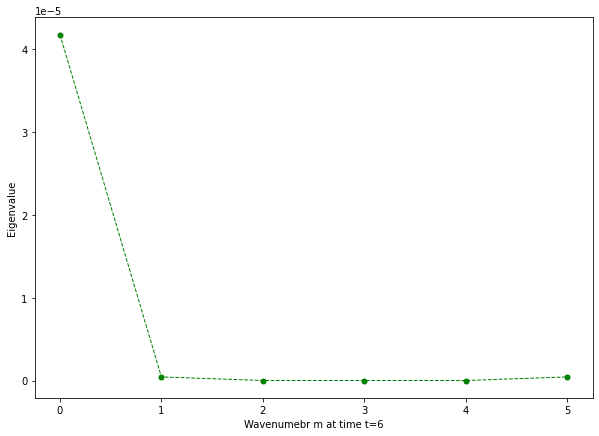

(6,)
[4.12770441e-05 1.74954413e-07 5.68746216e-16 1.46745176e-38
 5.68746216e-16 1.74954413e-07]


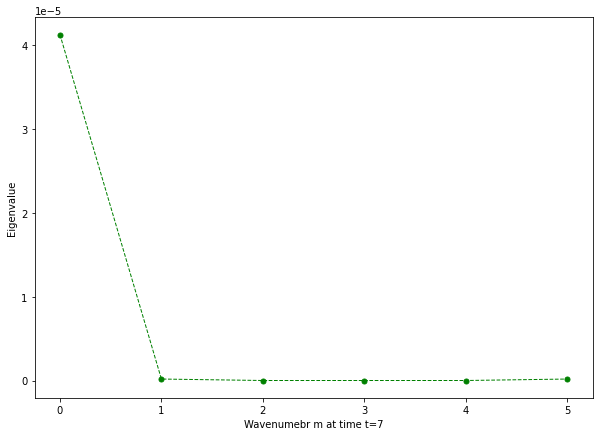

(6,)
[4.11067376e-05 7.12476118e-08 2.16640525e-16 1.37061856e-38
 2.16640525e-16 7.12476118e-08]


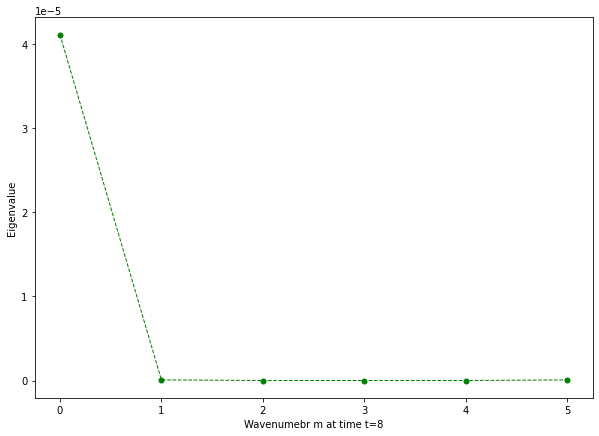

(6,)
[4.10366657e-05 2.90369344e-08 8.26075387e-17 1.71026231e-38
 8.26075387e-17 2.90369344e-08]


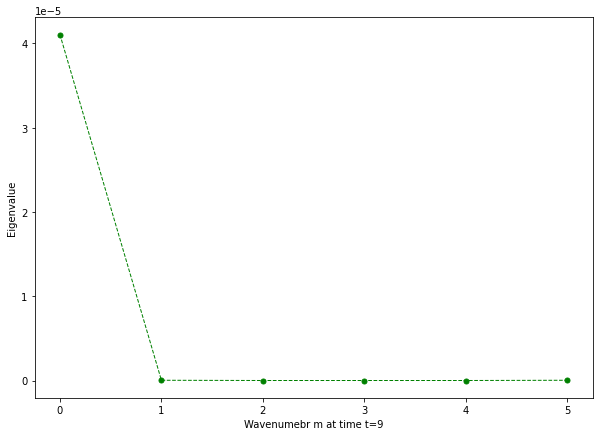

In [8]:
for time_slice in range(N_t):
    Q_t = np.asarray(Q[:, time_slice])
    print(Q_t.shape)
    print(Q_t)
    f = plt.figure()
    f.set_figwidth(10)
    f.set_figheight(7)
    plt.plot(Q_t,color='green', marker='o', linestyle='dashed',linewidth=1, markersize=5)
    plt.xlabel('Wavenumebr m at time t={}'.format(time_slice))
    plt.ylabel('Eigenvalue')
    file_name = str(time_slice)+".png"
    plt.savefig(file_name, dpi=500)
    plt.show()